In [1]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pyodbc
# specify the DSN name
dsn_name = 'KINGHENRYMORGAN'

# create the connection object
conn = pyodbc.connect(f"DSN={dsn_name}")
# create a cursor object
cursor = conn.cursor()
# execute a query
cursor.execute('SELECT * FROM [AdventureWorks2019].[HumanResources].[Employee]')
# fetch the results
results = cursor.fetchall()
# do something with the results
print(results)

[(1, '295847284', 'adventure-works\\ken0', None, None, 'Chief Executive Officer', '1969-01-29', 'S', 'M', '2009-01-14', True, 99, 69, True, 'F01251E5-96A3-448D-981E-0F99D789110D', datetime.datetime(2014, 6, 30, 0, 0)), (2, '245797967', 'adventure-works\\terri0', b'X', 1, 'Vice President of Engineering', '1971-08-01', 'S', 'F', '2008-01-31', True, 1, 20, True, '45E8F437-670D-4409-93CB-F9424A40D6EE', datetime.datetime(2014, 6, 30, 0, 0)), (3, '509647174', 'adventure-works\\roberto0', b'Z\xc0', 2, 'Engineering Manager', '1974-11-12', 'M', 'M', '2007-11-11', True, 2, 21, True, '9BBBFB2C-EFBB-4217-9AB7-F97689328841', datetime.datetime(2014, 6, 30, 0, 0)), (4, '112457891', 'adventure-works\\rob0', b'Z\xd6', 3, 'Senior Tool Designer', '1974-12-23', 'S', 'M', '2007-12-05', False, 48, 80, True, '59747955-87B8-443F-8ED4-F8AD3AFDF3A9', datetime.datetime(2014, 6, 30, 0, 0)), (5, '695256908', 'adventure-works\\gail0', b'Z\xda', 3, 'Design Engineer', '1952-09-27', 'M', 'F', '2008-01-06', True, 5, 22

In [3]:
import csv

# specify the name of the output file
output_file = 'HR_employee_data.csv'

# open the output file in write mode
with open(output_file, 'w', newline='') as file:
    # create a csv writer object
    writer = csv.writer(file)

    # write the header row
    writer.writerow([column[0] for column in cursor.description])

    # write the data rows
    writer.writerows(results)

print(f"Data written to {output_file} successfully!")

# close the cursor and connection
cursor.close()
conn.close()

Data written to HR_employee_data.csv successfully!


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('HR_employee_data.csv', encoding='ISO-8859-1')
# view the data
df.head()

,BusinessEntityID,NationalIDNumber,LoginID,OrganizationNode,OrganizationLevel,JobTitle,BirthDate,MaritalStatus,Gender,HireDate,SalariedFlag,VacationHours,SickLeaveHours,CurrentFlag,rowguid,ModifiedDate
0,1,295847284,adventure-works\ken0,NaN,NaN,Chief Executive Officer,1969-01-29,S,M,2009-01-14,True,99,69,True,F01251E5-96A3-448D-981E-0F99D789110D,2014-06-30 00:00:00
1,2,245797967,adventure-works\terri0,b'X',1.0,Vice President of Engineering,1971-08-01,S,F,2008-01-31,True,1,20,True,45E8F437-670D-4409-93CB-F9424A40D6EE,2014-06-30 00:00:00
2,3,509647174,adventure-works\roberto0,b'Z\xc0',2.0,Engineering Manager,1974-11-12,M,M,2007-11-11,True,2,21,True,9BBBFB2C-EFBB-4217-9AB7-F97689328841,2014-06-30 00:00:00
3,4,112457891,adventure-works\rob0,b'Z\xd6',3.0,Senior Tool Designer,1974-12-23,S,M,2007-12-05,False,48,80,True,59747955-87B8-443F-8ED4-F8AD3AFDF3A9,2014-06-30 00:00:00
4,5,695256908,adventure-works\gail0,b'Z\xda',3.0,Design Engineer,1952-09-27,M,F,2008-01-06,True,5,22,True,EC84AE09-F9B8-4A15-B4A9-6CCBAB919B08,2014-06-30 00:00:00


In [6]:
df.shape

(290, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BusinessEntityID   290 non-null    int64  
 1   NationalIDNumber   290 non-null    int64  
 2   LoginID            290 non-null    object 
 3   OrganizationNode   289 non-null    object 
 4   OrganizationLevel  289 non-null    float64
 5   JobTitle           290 non-null    object 
 6   BirthDate          290 non-null    object 
 7   MaritalStatus      290 non-null    object 
 8   Gender             290 non-null    object 
 9   HireDate           290 non-null    object 
 10  SalariedFlag       290 non-null    bool   
 11  VacationHours      290 non-null    int64  
 12  SickLeaveHours     290 non-null    int64  
 13  CurrentFlag        290 non-null    bool   
 14  rowguid            290 non-null    object 
 15  ModifiedDate       290 non-null    object 
dtypes: bool(2), float64(1), in

In [8]:
df.dtypes

BusinessEntityID       int64
NationalIDNumber       int64
LoginID               object
OrganizationNode      object
OrganizationLevel    float64
JobTitle              object
BirthDate             object
MaritalStatus         object
Gender                object
HireDate              object
SalariedFlag            bool
VacationHours          int64
SickLeaveHours         int64
CurrentFlag             bool
rowguid               object
ModifiedDate          object
dtype: object

In [9]:
print(df.isnull().sum())

BusinessEntityID     0
NationalIDNumber     0
LoginID              0
OrganizationNode     1
OrganizationLevel    1
JobTitle             0
BirthDate            0
MaritalStatus        0
Gender               0
HireDate             0
SalariedFlag         0
VacationHours        0
SickLeaveHours       0
CurrentFlag          0
rowguid              0
ModifiedDate         0
dtype: int64


In [10]:
# Remove rows with missing values
df = df.dropna()

# Convert the 'BirthDate' and 'HireDate' columns to datetime format
df['BirthDate'] = pd.to_datetime(df['BirthDate'])
df['HireDate'] = pd.to_datetime(df['HireDate'])

# Print the cleaned dataset
print(df)

     BusinessEntityID  NationalIDNumber                   LoginID  \
1                   2         245797967    adventure-works\terri0   
2                   3         509647174  adventure-works\roberto0   
3                   4         112457891      adventure-works\rob0   
4                   5         695256908     adventure-works\gail0   
5                   6         998320692   adventure-works\jossef0   
..                ...               ...                       ...   
285               286         758596752     adventure-works\lynn0   
286               287         982310417      adventure-works\amy0   
287               288         954276278   adventure-works\rachel0   
288               289         668991357      adventure-works\jae0   
289               290         134219713   adventure-works\ranjit0   

    OrganizationNode  OrganizationLevel                       JobTitle  \
1               b'X'                1.0  Vice President of Engineering   
2           b'Z\xc0'   

In [11]:
print(df.isnull().sum())

BusinessEntityID     0
NationalIDNumber     0
LoginID              0
OrganizationNode     0
OrganizationLevel    0
JobTitle             0
BirthDate            0
MaritalStatus        0
Gender               0
HireDate             0
SalariedFlag         0
VacationHours        0
SickLeaveHours       0
CurrentFlag          0
rowguid              0
ModifiedDate         0
dtype: int64


In [12]:
# Get count of unique values for categorical columns
print("\nValue counts for categorical columns:")
print(df['MaritalStatus'].value_counts())


Value counts for categorical columns:
M    146
S    143
Name: MaritalStatus, dtype: int64


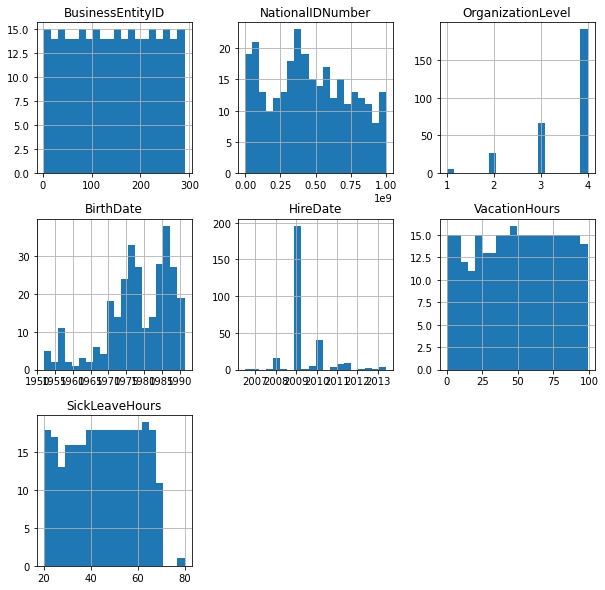

In [13]:
# Plot histograms for numerical columns
df.hist(bins=20, figsize=(10,10))
plt.show()

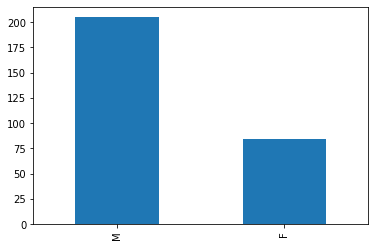

In [14]:
# Plot bar chart for categorical column
df['Gender'].value_counts().plot(kind='bar')
plt.show()

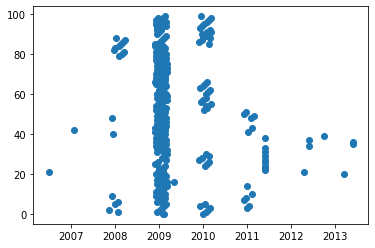

In [15]:
# Visualize relationship between two numerical variables
plt.scatter(df['HireDate'], df['VacationHours'])
plt.show()

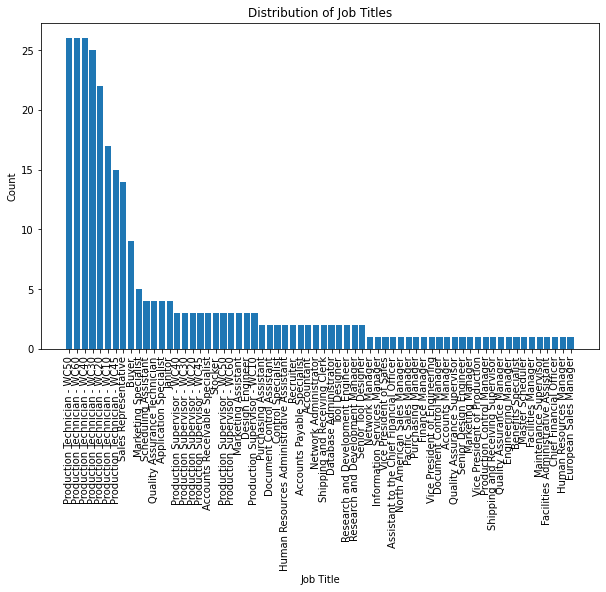

In [16]:
job_counts = df['JobTitle'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(job_counts.index, job_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Distribution of Job Titles')
plt.show()


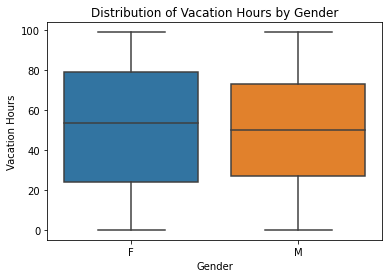

In [17]:
sns.boxplot(x='Gender', y='VacationHours', data=df)
plt.xlabel('Gender')
plt.ylabel('Vacation Hours')
plt.title('Distribution of Vacation Hours by Gender')
plt.show()

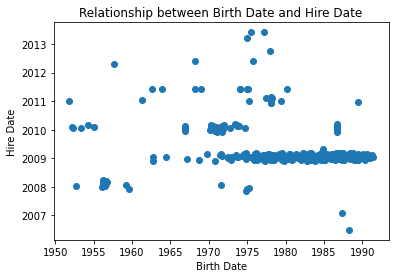

In [18]:
plt.scatter(df['BirthDate'], df['HireDate'])
plt.xlabel('Birth Date')
plt.ylabel('Hire Date')
plt.title('Relationship between Birth Date and Hire Date')
plt.show()

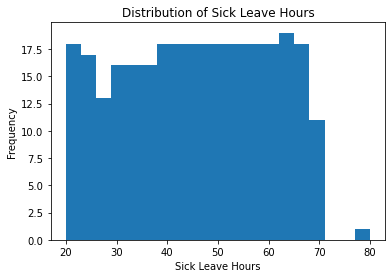

In [19]:
plt.hist(df['SickLeaveHours'], bins=20)
plt.xlabel('Sick Leave Hours')
plt.ylabel('Frequency')
plt.title('Distribution of Sick Leave Hours')
plt.show()

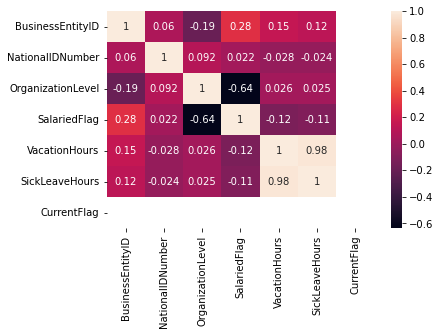

In [20]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [21]:
df.columns

Index(['BusinessEntityID', 'NationalIDNumber', 'LoginID', 'OrganizationNode',
       'OrganizationLevel', 'JobTitle', 'BirthDate', 'MaritalStatus', 'Gender',
       'HireDate', 'SalariedFlag', 'VacationHours', 'SickLeaveHours',
       'CurrentFlag', 'rowguid', 'ModifiedDate'],
      dtype='object')

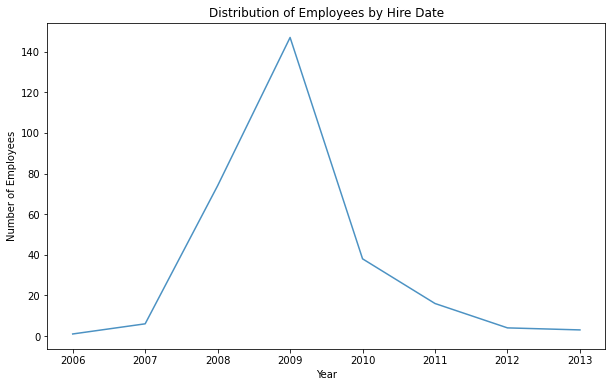

In [22]:
hire_date_counts = df['HireDate'].dt.year.value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.lineplot(x=hire_date_counts.index, y=hire_date_counts.values, alpha=0.8)
plt.title('Distribution of Employees by Hire Date')
plt.xlabel('Year')
plt.ylabel('Number of Employees')
plt.show()

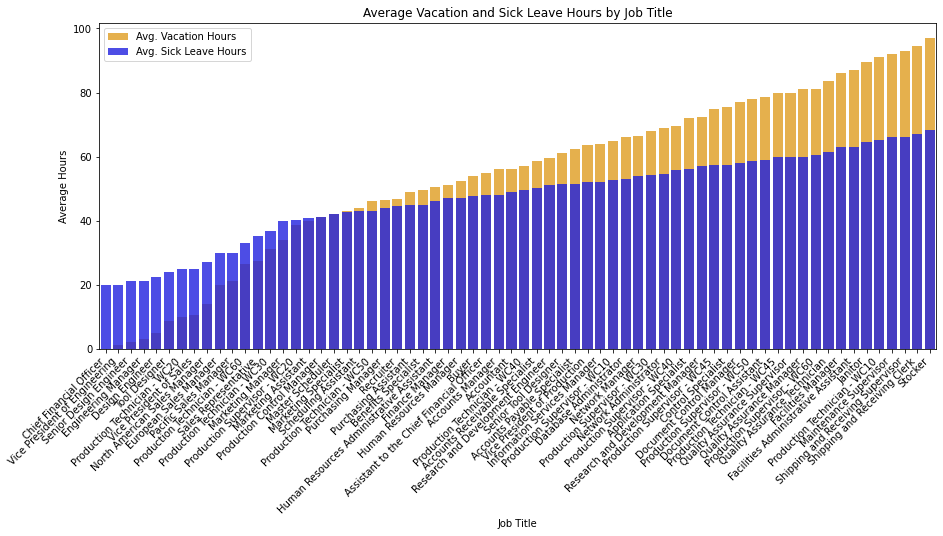

In [23]:
avg_vacation_hours = df.groupby('JobTitle')['VacationHours'].mean().sort_values()
avg_sick_leave_hours = df.groupby('JobTitle')['SickLeaveHours'].mean().sort_values()
plt.figure(figsize=(15,6))
sns.barplot(x=avg_vacation_hours.index, y=avg_vacation_hours.values, alpha=0.8, color='orange', label='Avg. Vacation Hours')
sns.barplot(x=avg_sick_leave_hours.index, y=avg_sick_leave_hours.values, alpha=0.8, color='blue', label='Avg. Sick Leave Hours')
plt.xticks(rotation=45, ha='right')
plt.title('Average Vacation and Sick Leave Hours by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Hours')
plt.legend()
plt.show()

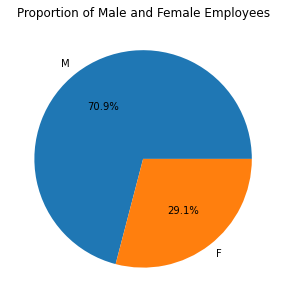

In [24]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Male and Female Employees')
plt.show()

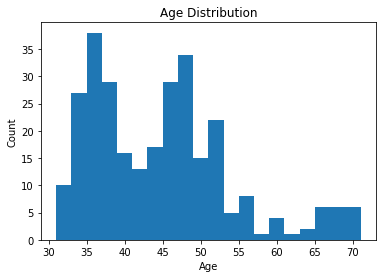

In [25]:
from datetime import datetime

def calculate_age(born):
    today = datetime.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df['Age'] = df['BirthDate'].apply(calculate_age)

plt.hist(df['Age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

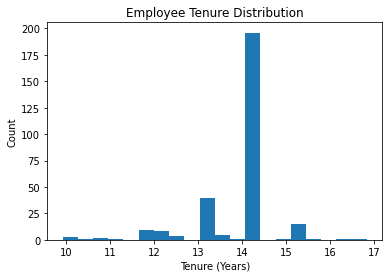

In [26]:
df['Tenure'] = (datetime.today() - df['HireDate']).dt.days/365

plt.hist(df['Tenure'], bins=20)
plt.title('Employee Tenure Distribution')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.show()

In [27]:
df.columns

Index(['BusinessEntityID', 'NationalIDNumber', 'LoginID', 'OrganizationNode',
       'OrganizationLevel', 'JobTitle', 'BirthDate', 'MaritalStatus', 'Gender',
       'HireDate', 'SalariedFlag', 'VacationHours', 'SickLeaveHours',
       'CurrentFlag', 'rowguid', 'ModifiedDate', 'Age', 'Tenure'],
      dtype='object')

In [28]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# Keep only the relevant columns
relevant_cols = ['Age', 'Tenure', 'JobTitle', 'MaritalStatus', 'Gender', 'SalariedFlag', 'VacationHours', 'SickLeaveHours']
df = df[relevant_cols]

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=["JobTitle", "MaritalStatus", "Gender"])

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop("SalariedFlag", axis=1), df["SalariedFlag"], test_size=0.2, random_state=42)

# Build a decision tree classifier model
clf = DecisionTreeClassifier()

# Train the model on the training data
clf.fit(X_train, y_train)

# Evaluate the model on the test data
score = clf.score(X_test, y_test)
print("Model accuracy:", score)

Model accuracy: 0.9310344827586207


In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Predict the test labels using the decision tree classifier
y_pred = clf.predict(X_test)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate ROC/AUC score and curve
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("ROC/AUC score:", roc_auc)

Precision: 1.0
Recall: 0.6
F1 score: 0.7499999999999999
ROC/AUC score: 0.8


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to search over
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Create a random forest classifier
clf = RandomForestClassifier(random_state=42)

# Create a grid search object
grid_search = GridSearchCV(
    clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring="roc_auc"
)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters: ", grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the test data
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_clf.predict_proba(X_test)[:, 1])
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("ROC/AUC score:", roc_auc)

Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Precision: 1.0
Recall: 0.3
F1 score: 0.4615384615384615
ROC/AUC score: 0.9
